In [1]:
import pandas as pd
from datetime import datetime
import time
import numpy as np
import pandas as pd
import io

In [2]:
df = pd.read_csv('duk_merge.csv')
# Inspect the data

df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

In [3]:
data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))
train_data_date = data_date[0:int(training_data_date), :]

In [4]:
import tensorflow.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense, Input, Embedding, Dropout, Activation, Conv1D
from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:

import tensorflow as tf
print(tf.__version__)

2.8.0


In [6]:
data = pd.DataFrame()
data['Close']=df['Close']
count_nan = len(df) - df.count()
print(count_nan)

Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64


In [7]:
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
# training_data_len = math.ceil( len(dataset) *.6)
training_data_len = math.ceil( len(dataset)*.95) 



#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)    


#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [8]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])



#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [9]:
dataDimension = int(x_train.shape[1]) 

In [10]:
cell = "FastRNN" 
 
inputDims = 1 #features taken in by RNN in one timestep
hiddenDims = 50 #hidden state of RNN
 
totalEpochs = 8
batchSize = 64
 
learningRate = 0.001 
decayStep = 50
decayRate = 0.1
 
outFile = None
 

wRank = None 
uRank = None 
 

sW = 1.0 
sU = 1.0
 
#Non-linearities for the RNN architecture. Can choose from "tanh, sigmoid, relu, quantTanh, quantSigm"
update_non_linearity = "relu"
gate_non_linearity = "relu"


cell == "FastRNN"

True

In [11]:
print(x_train.shape)
x_train = np.reshape(x_train,[x_train.shape[0],x_train.shape[1],1])
print(x_test.shape)
x_test = np.reshape(x_test,[x_test.shape[0],x_test.shape[1],1])
print(x_train.shape)
print(x_test.shape)

(6594, 60, 1)
(350, 60, 1)
(6594, 60, 1)
(350, 60, 1)


Epoch 1/100
104/104 [==============================] - 18s 112ms/step - loss: 0.0125
Epoch 2/100
104/104 [==============================] - 15s 143ms/step - loss: 1.9698e-04
Epoch 3/100
104/104 [==============================] - 15s 141ms/step - loss: 1.4592e-04
Epoch 4/100
104/104 [==============================] - 19s 187ms/step - loss: 1.1404e-04
Epoch 5/100
104/104 [==============================] - 23s 224ms/step - loss: 1.2732e-04
Epoch 6/100
104/104 [==============================] - 32s 312ms/step - loss: 9.8557e-05
Epoch 7/100
104/104 [==============================] - 30s 291ms/step - loss: 9.6686e-05
Epoch 8/100
104/104 [==============================] - 26s 255ms/step - loss: 9.5694e-05
Epoch 9/100
104/104 [==============================] - 28s 266ms/step - loss: 9.2246e-05
Epoch 10/100
104/104 [==============================] - 29s 275ms/step - loss: 6.8722e-05
Epoch 11/100
104/104 [==============================] - 28s 272ms/step - loss: 6.8462e-05
Epoch 12/100
104/104 [=

104/104 [==============================] - 46s 443ms/step - loss: 4.2981e-05
Epoch 93/100
104/104 [==============================] - 52s 506ms/step - loss: 3.9913e-05
Epoch 94/100
104/104 [==============================] - 57s 547ms/step - loss: 2.7760e-05
Epoch 95/100
104/104 [==============================] - 48s 461ms/step - loss: 3.0584e-05
Epoch 96/100
104/104 [==============================] - 47s 458ms/step - loss: 4.6113e-05
Epoch 97/100
104/104 [==============================] - 47s 453ms/step - loss: 2.4998e-05
Epoch 98/100
104/104 [==============================] - 48s 464ms/step - loss: 2.6643e-05
Epoch 99/100
104/104 [==============================] - 47s 451ms/step - loss: 3.3930e-05
Epoch 100/100
104/104 [==============================] - 47s 450ms/step - loss: 5.1014e-05


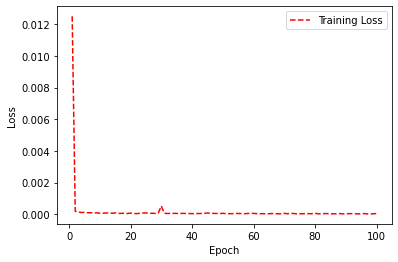

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
import matplotlib.pyplot as plt

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
regressor.add(Conv1D(filters=300, kernel_size=3 , padding='same', activation='relu', name='Conv1D'))
regressor.add(MaxPooling1D(pool_size=1,name='MaxPooling1D'))


#Adding the second RNN layer and some Dropout regularization
regressor.add(Bidirectional(LSTM(units=50, return_sequences=False)))
regressor.add(Dense(1))
# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = regressor.fit(x_train, y_train, batch_size=64, epochs=100)

# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


In [17]:
# Get the models predicted price values 
predictions = regressor.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


0.13393575503771493

In [18]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

train = data[:training_data_len]
valid_3 = data[training_data_len:]
valid_3['Predictions'] = predictions

mape(valid_3['Close'], valid_3['Predictions'])

<ipython-input-18-e67ee0326cb9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_3['Predictions'] = predictions


0.11955819390986352

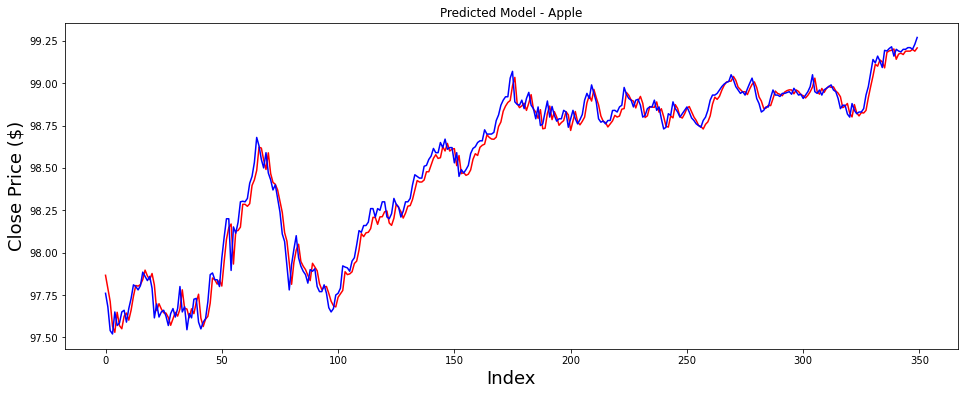

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Predicted Model - Apple')
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
#plt.plot(train['Close'], 'b-', label = 'train')
plt.plot(predictions,'r-', label = 'predict')
plt.plot(y_test,'b-', label = 'actual')
#plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()